### Diagrama da solução

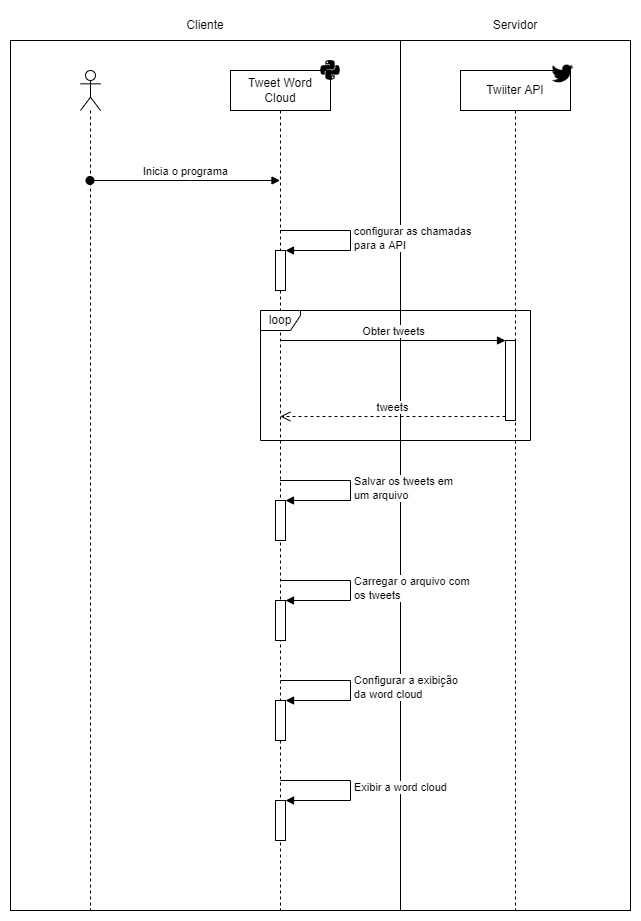

### 1 - Configurando as chamadas da API para o twitter

Nesse passo será configurado um cliente para realizar as chamadas para a API do Twitter.

Além disso, será configurado os parâmetros de autenticação e query.

In [ ]:
# Para se obter os tweets, usaremos a biblioteca tweepy.
# O Colab tem uma versão antiga da biblioteca do tweepy, então temos que 
# instalar uma versão mais nova.
# Podemos fazer isso com o seguinte comando:
!pip install tweepy==4.10.0

In [ ]:
# Importando as biblitoecas que iremos utilizar
# Bibliotecas são um conjunto de funções que podemos chamar
import tweepy
import json

In [ ]:
# Declarando as variáveis para montar a configuração da busca do twitter

# Quantidade de tweets que irão voltar na resposta da API
tweets_per_query = 100
# Query: Fake news em português e não são postagens to tipo retweet
query = "fake news lang:pt -is:retweet" 
# Declarando o número de requisições que quremos fazer
number_of_requests = 150
# Campos dos dados que serão trazidos
fields_to_retrieve = ["lang", "author_id", "source", "created_at"]

In [ ]:
# Declarando a variável que irá armazenar nosso token de acesso a API do twitter
twitter_api_token = '' # INSIRA SEU TOKEN DA API AQUI

In [ ]:
# Criando um cliente da API do twitter
twitter_client = tweepy.Client(bearer_token=twitter_api_token)

### 2 - Obtendo os tweets através da API

Os tweets serão obtidos nesse passo através de um loop. Os resultados serão guardados em uma lista

In [ ]:
# Declarando uma lista para guardar os tweets
tweets = []

In [ ]:
# Iterando X vezes para obter os tweets
for i in range(number_of_requests):
    # Imprimindo o progresso atual das requisições
    print(f"Performing request: {i+1}/{number_of_requests}")
    
    # Fazendo a requisição para o twitter para obter tweets recentes
    # com a configuração da query qye foi criada
    # O `tweet_fields` é utilizado para informarmos algum outro campo que 
    # queremos trazer da API do twitter
    api_response = twitter_client.search_recent_tweets(
        query=query,
        tweet_fields=fields_to_retrieve
    )

    # Caso não recebermos resposta da api
    if not api_response:
        # Imprimindo na tela uma mensagem de erro
        print(f"Error getting tweets at request: {i+1}/{number_of_requests}")
        # Passa para a próxima iteração do loop ignorando qualquer outro trecho
        # de código
        continue 

    # Extraindo os tweets da resposta que recebemos
    for tweet in api_response.data:
        tweet_to_store = {
            'id': tweet.id,
            'text': tweet.text,
            'lang': tweet.lang,
            'author_id': tweet.author_id,
            'created_at': tweet.created_at.isoformat(),
        }
        # Adicionando o tweet extraído na lista de tweets
        tweets.append(tweet_to_store)

Performing request: 1/150
Performing request: 2/150
Performing request: 3/150
Performing request: 4/150
Performing request: 5/150
Performing request: 6/150
Performing request: 7/150
Performing request: 8/150
Performing request: 9/150
Performing request: 10/150
Performing request: 11/150
Performing request: 12/150
Performing request: 13/150
Performing request: 14/150
Performing request: 15/150
Performing request: 16/150
Performing request: 17/150
Performing request: 18/150
Performing request: 19/150
Performing request: 20/150
Performing request: 21/150
Performing request: 22/150
Performing request: 23/150
Performing request: 24/150
Performing request: 25/150
Performing request: 26/150
Performing request: 27/150
Performing request: 28/150
Performing request: 29/150
Performing request: 30/150
Performing request: 31/150
Performing request: 32/150
Performing request: 33/150
Performing request: 34/150
Performing request: 35/150
Performing request: 36/150
Performing request: 37/150
Performing

### 3 - Salvando os tweets em um arquivo JSON

Todos os tweets coletados serão salvos em um arquivo, dessa forma, pode-se usar esse arquivo para algum outro tipo de análise

In [ ]:
# Declarando a variável com o nome do arquivo que será armazenado os tweets 
# O arquivo tem a extensão json que é uma extensão própria para guardar
# informações desse tipo.
tweets_file_name = 'tweets.json'

In [ ]:
# Salvando os tweets no arquivo
with open(tweets_file_name, 'w', encoding='utf-8') as f:
    json.dump(tweets, f, ensure_ascii=False, indent=4)
# Esse arquivo será salvo na máquina virtual em que o Colab alocou, mas não vai 
# ficar disponível para sempre, então o ideal é baixar o arquivo para seu 
# computador

### 4 - Carregando os tweets do arquivo JSON

Os tweets serao carregados do arquivo JSON que foi previamente salvo

In [ ]:
# Carregando os tweets do arquivo
with open(tweets_file_name) as json_file:
   tweets = json.load(json_file)
# Atenção: Carregar os dados do arquivo é opcional! Os dados dos tweets
# já estão armazenados na variável 'tweets'

### 5 - Configurando a exibição da word cloud

Preparação dos dados para realizar a montagem do word cloud. Aqui teremos que transformar o texto de todos os tweets em um único texto

In [ ]:
# Construido uma lista com os textos dos tweets
# Esta lista será utilizada para criar um grande e único texto contendo todas as
# sentenças
tweets_texts = []
for tweet in tweets:
    tweets_texts.append(tweet['text'])

In [ ]:
# Juntando todos os tweets em um grande e único texto, separado por espaços
# A biblioteca que usaremos para montar a wordcloud trabalha com um texto único
# e não com uma lista
all_tweets_string=(" ").join(tweets_texts)

In [ ]:
# Importando as bibliotecas para construir a word cloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Criando um novo objeto com as configurações da word cloud
wordcloud = WordCloud(width=1920, height=1080).generate(all_tweets_string)

### 6 - Mostrando a word cloud

Criando o objeto de imagem para renderizar a word cloud

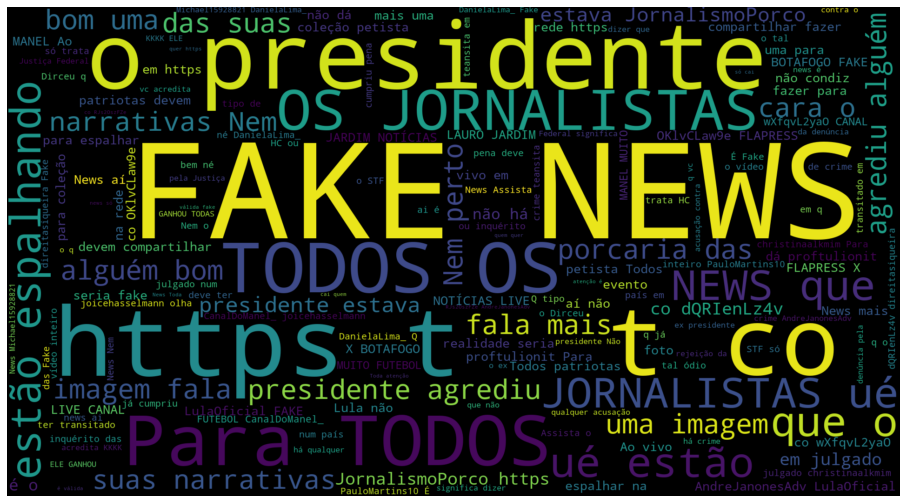

In [ ]:
# Configurando a word cloud
plt.figure( figsize=(16,9) )
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

# Mostrando a word cloud
plt.show()